# Regressão linear

Dado um conjunto de pontos bidimensioneis é possível traçar uma reta que melhor se ajuste aos pontos, ou seja, que estão suficientemente próximos da maior quantidade de pontos.



In [121]:
# Realizando importações das bibs
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

In [122]:
# Criando o conjunto de dados como um dataframe
dt = {"x": [1, 2, 3, 4, 5], "y": [1.3, 1.8, 3.5, 4, 4.6]}
dados = pd.DataFrame(dt)

In [123]:
# Visualizando os dado
dados

,x,y
0,1,1.3
1,2,1.8
2,3,3.5
3,4,4.0
4,5,4.6


In [124]:
# Ajustando os dados para 2D para usar o regressor
x = dados.x.values.reshape(-1, 1)
y = dados.y.values.reshape(-1, 1)

In [125]:
# Realizando a regressão
regressao = LinearRegression().fit(x, y)

In [126]:
# Visualizando o coeficiente angular
a = regressao.coef_[0]
a

array([0.88])

In [127]:
# Visualizando o coenficiente linear
b = regressao.intercept_
b

array([0.4])

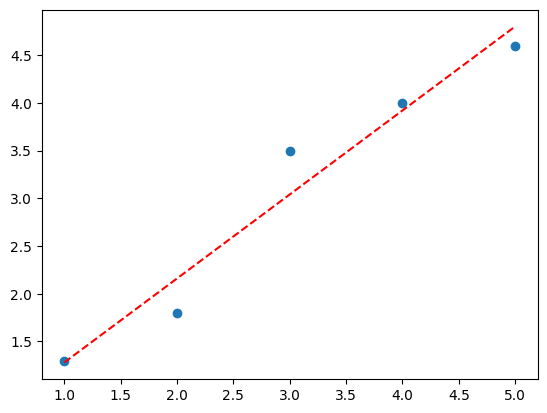

In [128]:
# Visualizando a reta da regressão
fig, ax = plt.subplots()
ax.scatter(dados.x, dados.y)


# Criando uma série de pontos baseado nos coeficientes
y = a * x + b

ax.plot(x, y, "--r")
plt.show()

In [129]:
# Realizando predições e adicionando aos dados
dados["y_pred"] = regressao.predict(x)

In [130]:
# Visualizando sem os índices
dados.style.hide(axis="index")

x,y,y_pred
1,1.300000,1.280000
2,1.800000,2.160000
3,3.500000,3.040000
4,4.000000,3.920000
5,4.600000,4.800000


In [131]:
# Calculando o erro e adicionando aos dados
# o erro é (y - y_pred)**2
dados["erro_pred"] = (dados.y - dados.y_pred) ** 2

In [132]:
# Visualizando os erros
dados

,x,y,y_pred,erro_pred
0,1,1.3,1.28,0.0004
1,2,1.8,2.16,0.1296
2,3,3.5,3.04,0.2116
3,4,4.0,3.92,0.0064
4,5,4.6,4.80,0.0400


In [133]:
# Soma dos erros
dados["erro_pred"].sum()

0.3880000000000001

In [134]:
# Métricas de erro
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [135]:
print(mean_absolute_error(dados.y, dados.y_pred))

# O famoso R**2
print(mean_squared_error(dados.y, dados.y_pred))

0.22400000000000003
0.07760000000000003


# Aplicação de regressão linear


In [136]:
# Importando o dataset
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

In [137]:
# Visualizando o dataset
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [138]:
# Transformando em um dataframe

dataset = pd.DataFrame(data.data)
dataset.columns = data.feature_names

dataset[data.target_names[0]] = data.target

In [139]:
# Visualizando o dataset
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Regressão Linear Simples

A simples relacionar uma variável ao target, na composta relaciona mais de uma variável

In [140]:
# Variável X
X = dataset.MedInc

# Variável y
y = dataset.MedHouseVal

In [141]:
# Importando recursos para o treinamento/ regressão
from sklearn.model_selection import train_test_split

# Separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [142]:
# Realizando o treinamento que basicamente é fazendo a regressão

x_reg = X_train.values.reshape(-1, 1)

reg2 = LinearRegression().fit(x_reg, y_train)

In [143]:
# Realizando uma predição
y_pred = reg2.predict(X_test.values.reshape(-1, 1))

In [144]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.6265986453094173
0.7028461448540976


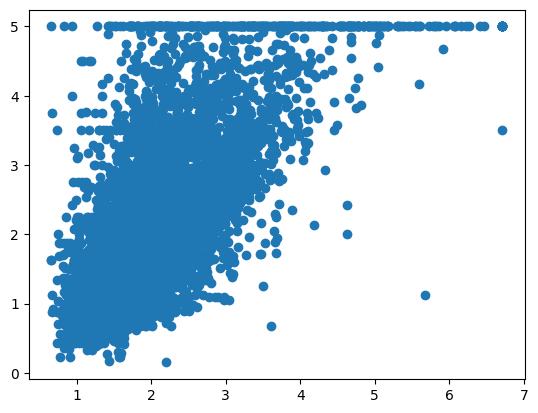

In [145]:
# Visualizando os pontos
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test)

plt.show()

# Regressão Linear Múltipla

In [146]:
# Variável X
X = dataset.drop(columns=["MedHouseVal"])

# Variável y
y = dataset.MedHouseVal

In [147]:
# Separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [148]:
# Realizando o treinamento que basicamente é fazendo a regressão

# Como temos mais de uma coluna o formato dos dados não precisa ser alterado
# x_reg = X_train.values.reshape(-1, 1)

reg2 = LinearRegression().fit(X_train, y_train)

In [149]:
# Realizando uma predição
y_pred = reg2.predict(X_test)

In [150]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.5295710106684458
0.5369686543372465


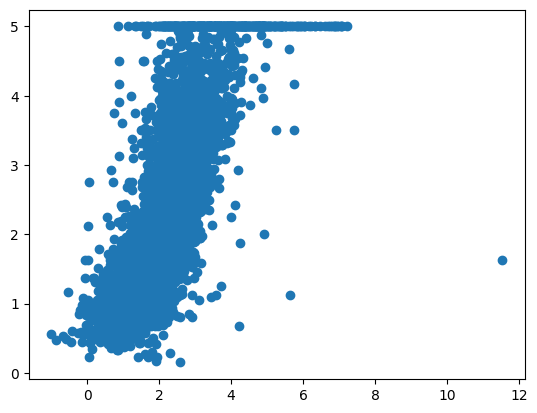

In [151]:
# Visualizando os pontos
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test)

plt.show()